# 1. Pobranie zbioru danych z Repozytorium

In [1]:
!curl -OL https://git.wmi.amu.edu.pl/s434788/ium_434788/raw/branch/master/winequality-red.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   98k    0   98k    0     0  74502      0 --:--:--  0:00:01 --:--:-- 74502


In [2]:
import pandas as pd
wine=pd.read_csv('winequality-red.csv')
wine

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[1599 rows x 12 columns]

# 2. Podział na zbiory test/train przy pomocy SciKit + (poprawka z 26.03.2021 przy pomocy basha)

## 2.1 SciKit

Próbowałem również podzielić na podzbiory Train:Dev:Test 6:2:2 Przy pomocy basha ale uznałem, że wygodniejsze jest korzystanie z "train_test_split()". Docelowo podział będzie dokonywany na 4 zmienne ` X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)`, jednak chciałem zachować konwencje z przykładu, z ćwiczeń.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [3]:
from sklearn.model_selection import train_test_split

wine_train, wine_test = train_test_split(wine, test_size=360,train_size=959, random_state=1)

In [4]:
wine_test["quality"].value_counts()

5    155
6    149
7     37
4     16
8      2
3      1
Name: quality, dtype: int64

In [5]:
wine_train["quality"].value_counts()

5    400
6    388
7    125
4     30
8     11
3      5
Name: quality, dtype: int64

## 2.2 Bash

In [6]:
!head -n 1 winequality-red.csv > header.csv
!tail -n +2 winequality-red.csv | shuf > data.shuffled

!head -n 266 data.shuffled > wine.data.test
!head -n 532 data.shuffled | tail -n 266 > wine.data.dev
!tail -n +333 data.shuffled > wine.data.train

!cat header.csv wine.data.test > test.csv
!cat header.csv wine.data.dev > dev.csv
!cat header.csv wine.data.train > train.csv

In [7]:
!wc -l test.csv
!wc -l dev.csv
!wc -l train.csv

267 test.csv
267 dev.csv
1268 train.csv


In [8]:
wine_test_bash=pd.read_csv('test.csv')
wine_dev_bash=pd.read_csv('dev.csv')
wine_train_bash=pd.read_csv('train.csv')

# 3. Statystyki dla zbiorów

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

## 3.1. Zbiór Train (bash)

In [10]:
wine_train_bash

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0              10.0             0.380         0.38  ...       0.65      8.5        5
1               6.7             0.460         0.24  ...       0.60     10.6        6
2               7.2             0.695         0.13  ...       0.54     10.1        5
3              12.5             0.600         0.49  ...       0.74     11.9        6
4               8.3             0.560         0.22  ...       0.62      9.5        5
...             ...               ...          ...  ...        ...      ...      ...
1262            7.8             0.560         0.12  ...       0.50      9.4        6
1263            5.8             0.680         0.02  ...       0.52     10.0        5
1264            7.7             0.630         0.08  ...       0.54      9.5        6
1265            7.1             0.600         0.00  ...       0.70      9.9        6
1266           10.4             0.610         0.49  ...       0.63      8.4        3

[1267 rows x 12 columns]

In [11]:
wine_train_bash["quality"].value_counts()

5    550
6    498
7    157
4     39
8     15
3      8
Name: quality, dtype: int64

In [12]:
wine_train_bash.describe(include='all')

fixed acidity  volatile acidity  ...      alcohol      quality
count    1267.000000       1267.000000  ...  1267.000000  1267.000000
mean        8.344199          0.525888  ...    10.396725     5.632991
std         1.789253          0.177804  ...     1.042353     0.806931
min         4.700000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.300000          0.640000  ...    11.000000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

Testowy Wykres (quality, volatile acidity)

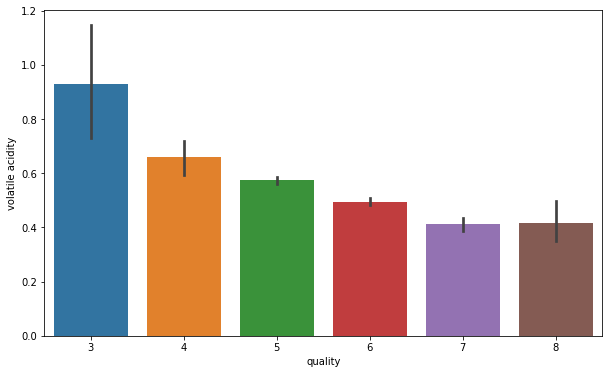

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_train_bash)

## 3.2. Zbiór Test (bash)

In [14]:
wine_test_bash

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0              7.1              0.60         0.01  ...       0.61     10.9        6
1              7.8              0.61         0.29  ...       1.56      9.1        5
2              7.1              0.63         0.06  ...       0.73      9.6        5
3              9.1              0.30         0.41  ...       0.85     11.7        7
4              9.0              0.46         0.31  ...       0.63      9.5        6
..             ...               ...          ...  ...        ...      ...      ...
261            7.2              0.60         0.04  ...       0.55      9.5        5
262            8.4              0.67         0.19  ...       0.59      9.2        4
263            8.8              0.61         0.19  ...       0.50     10.0        6
264            9.6              0.68         0.24  ...       0.60     10.2        5
265           10.5              0.43         0.35  ...       0.69     10.5        6

[266 rows x 12 columns]

In [15]:
wine_test_bash["quality"].value_counts()

6    109
5    108
7     37
4      8
8      2
3      2
Name: quality, dtype: int64

In [16]:
wine_test_bash.describe(include='all')

fixed acidity  volatile acidity  ...     alcohol     quality
count     266.000000        266.000000  ...  266.000000  266.000000
mean        8.245865          0.529455  ...   10.569925    5.665414
std         1.526175          0.181583  ...    1.149728    0.808497
min         4.600000          0.180000  ...    9.000000    3.000000
25%         7.200000          0.392500  ...    9.500000    5.000000
50%         8.000000          0.520000  ...   10.250000    6.000000
75%         9.100000          0.630000  ...   11.400000    6.000000
max        13.300000          1.330000  ...   14.000000    8.000000

[8 rows x 12 columns]

Testowy Wykres (quality, volatile acidity)

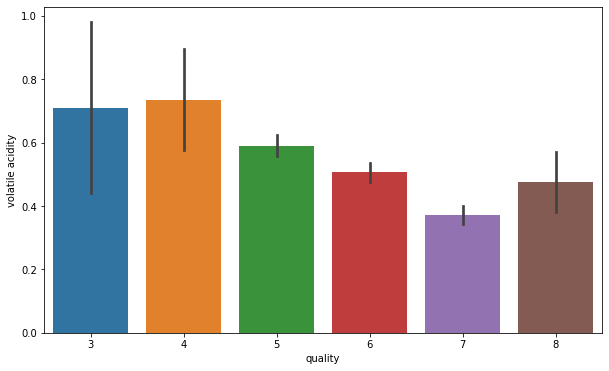

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_test_bash)

## 3.3. Cały zbiór

In [18]:
wine

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[1599 rows x 12 columns]

In [19]:
wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [20]:
wine.describe(include='all')

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

Testowy Wykres (quality, volatile acidity)

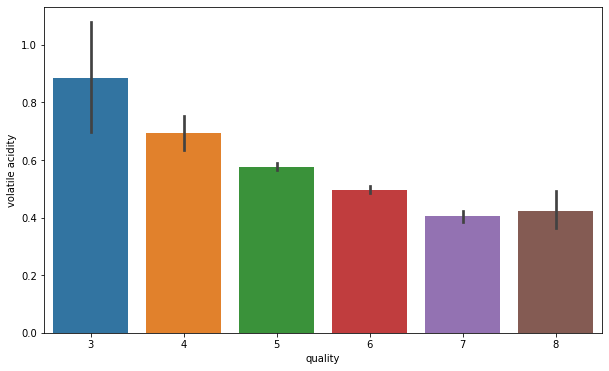

In [21]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

## 3.4. zbiór Dev (bash)

In [22]:
wine_dev_bash

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0              8.0             0.705         0.05  ...       0.95     10.5        6
1              7.6             0.665         0.10  ...       0.51      9.3        5
2              7.8             0.550         0.35  ...       0.56      9.2        5
3             13.0             0.320         0.65  ...       0.61     10.6        5
4              8.8             0.610         0.30  ...       0.51      9.3        4
..             ...               ...          ...  ...        ...      ...      ...
261           13.8             0.490         0.67  ...       0.93     12.0        6
262            7.1             0.750         0.01  ...       0.40     12.8        6
263            9.9             0.350         0.41  ...       0.50      9.5        5
264            6.5             0.520         0.11  ...       0.52      9.3        5
265            6.8             0.670         0.00  ...       0.74      9.7        5

[266 rows x 12 columns]

In [23]:
wine_dev_bash["quality"].value_counts()

5    115
6    113
7     24
4      9
8      3
3      2
Name: quality, dtype: int64

In [24]:
wine_dev_bash.describe(include='all')

fixed acidity  volatile acidity  ...     alcohol     quality
count     266.000000        266.000000  ...  266.000000  266.000000
mean        8.273684          0.540075  ...   10.453321    5.590226
std         1.720592          0.193856  ...    1.058010    0.777841
min         4.900000          0.120000  ...    8.500000    3.000000
25%         7.100000          0.396250  ...    9.500000    5.000000
50%         7.900000          0.520000  ...   10.200000    6.000000
75%         9.200000          0.648750  ...   11.200000    6.000000
max        15.600000          1.580000  ...   14.000000    8.000000

[8 rows x 12 columns]

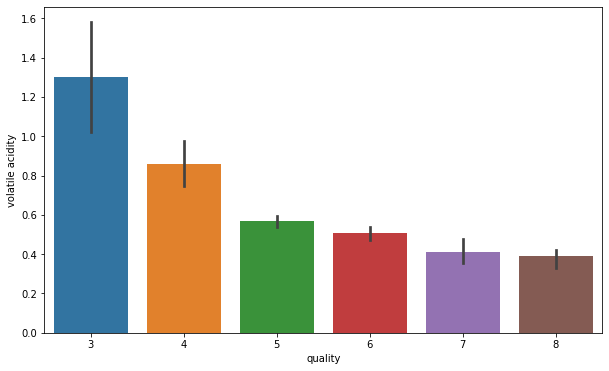

In [25]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_dev_bash)

# 4. Normalizacja

Normalizacja kolumny 'quality' na wartości od 0 do 20. Nie jest ona konieczna ale została stworzona w celach demonstracyjnych

In [26]:
wine["quality"]=((wine["quality"]-wine["quality"].min())/(wine["quality"].max()-wine["quality"].min()))*20

In [27]:
wine

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4      8.0
1               7.8             0.880         0.00  ...       0.68      9.8      8.0
2               7.8             0.760         0.04  ...       0.65      9.8      8.0
3              11.2             0.280         0.56  ...       0.58      9.8     12.0
4               7.4             0.700         0.00  ...       0.56      9.4      8.0
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5      8.0
1595            5.9             0.550         0.10  ...       0.76     11.2     12.0
1596            6.3             0.510         0.13  ...       0.75     11.0     12.0
1597            5.9             0.645         0.12  ...       0.71     10.2      8.0
1598            6.0             0.310         0.47  ...       0.66     11.0     12.0

[1599 rows x 12 columns]

In [28]:
wine["quality"].value_counts()

8.0     681
12.0    638
16.0    199
4.0      53
20.0     18
0.0      10
Name: quality, dtype: int64

# 5. Usuwanie artefaktów

### Całe szczęscie nie ma w moim zbiorze ani pustych linijek, ani przykładów z niepoprawnymi wartościami

In [29]:
# Znajdźmy pustą linijkę:
! grep -P "^$" -n winequality-red.csv

Szukanie wartości "NA": https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [30]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
wine.dropna(inplace=True) 

In [32]:
wine

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4      8.0
1               7.8             0.880         0.00  ...       0.68      9.8      8.0
2               7.8             0.760         0.04  ...       0.65      9.8      8.0
3              11.2             0.280         0.56  ...       0.58      9.8     12.0
4               7.4             0.700         0.00  ...       0.56      9.4      8.0
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5      8.0
1595            5.9             0.550         0.10  ...       0.76     11.2     12.0
1596            6.3             0.510         0.13  ...       0.75     11.0     12.0
1597            5.9             0.645         0.12  ...       0.71     10.2      8.0
1598            6.0             0.310         0.47  ...       0.66     11.0     12.0

[1599 rows x 12 columns]